<a href="https://colab.research.google.com/github/Grumpy-Kitten/ntu-msis-data-mining/blob/assignment-2/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

## Efficiency Analysis of Association Rule Mining Algorithms

**Author Name: TANG Xiaoyue, Matric Number: G2305058E**

==> Task Divided

1. Choose an Association Rule Mining Tool:

Select a tool from the provided list or find one on GitHub that implements Apriori or any other association rule mining algorithm.
2. Prepare Datasets:

Create 4-8 datasets of different sizes. Ensure you vary either the number of transactions or the number of unique items while keeping the other variable constant.
3. Run the Association Rule Mining Program:

Use your chosen tool to run association rule mining on the prepared datasets.
Measure the time taken for frequent itemset generation and high-confidence rules generation separately or combined.
4. Estimate Brute-Force Time:

Estimate the time required for the same task using a brute-force approach. You can refer to "IN6227 Data Mining Assignment 2 - Reference" for guidance on estimating brute-force time.
5. Plot the Data:

Create a plot that compares the measured time (using association rule mining tools/algorithms) and the estimated time (using brute-force approaches). This could be a bar chart or a line graph, whichever represents the data effectively.

## 1. Choice of AR: Apriori

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install apyori
from apyori import apriori

## 2. Dataset

1. [Groceries Dataset](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset/)
2. [Online Retail Dataset](https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset/data)
3. [Bakery Dataset](https://www.kaggle.com/datasets/akashdeepkuila/bakery/data)
4. [Mushroom Classification Dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification/data)
5. [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data)
6. [Chess Game Dataset](https://www.kaggle.com/datasets/adityajha1504/chesscom-user-games-60000-games/data)

In [ ]:
import pandas as pd
from IPython.display import HTML, display

current_path = "/content/drive/MyDrive/Study/NTU WKWSCI MSIS/Data Mining/Assignments/Assignment 2/Datasets/"
datasets = ['groceries-dataset','online-retail','bakery-dataset','mushrooms-classification','wine-quality-dataset','club-games-data']

for dataset in datasets:
  print("\n", dataset, "\n")

  # Load the dataset
  data = pd.read_csv(current_path+dataset+".csv")
  print(len(data.index))
  display(data.head())


 groceries-dataset 

38765


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk



 online-retail 

541909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



 bakery-dataset 

20507


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend



 mushrooms-classification 

8124


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g



 wine-quality-dataset 

1143


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



 club-games-data 

66879


,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."


**Data Preprocessing**

---
*Same number of transactions:*

1. Groceries Data

In [ ]:
def groceries_data_prep(data):
  # Data Cleaning
  # Convert the "Date" column to datetime format
  data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

  # Data Transformation
  # Group items by Member_number and Date, join itemDescriptions as a list
  transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

  return transactions.sample(n = 8000)

# groceries_data = pd.read_csv(current_path+'groceries-dataset.csv')
# preprocessed_groceries_data = groceries_data_prep(groceries_data)
# display(preprocessed_groceries_data)

2. Retail Data

In [ ]:
def retail_data_prep(data):
  # Handling Missing Values
  data.dropna(subset=['CustomerID'], inplace=True)  # Remove rows with missing CustomerID
  # Handle other columns with missing values as needed

  # Date and Time Processing
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
  data['Year'] = data['InvoiceDate'].dt.year
  data['Month'] = data['InvoiceDate'].dt.month
  data['Day'] = data['InvoiceDate'].dt.day
  data['Hour'] = data['InvoiceDate'].dt.hour

  # Categorical Data Encoding (using one-hot encoding as an example)
  data = pd.get_dummies(data, columns=['StockCode', 'Country'], drop_first=True)

  # Filtering Data (assuming Quantity and UnitPrice should be positive)
  data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

  # Transaction Preparation
  transactions = data.groupby('InvoiceNo')['Description'].apply(list).reset_index()

  return transactions.sample(n = 8000)

# retail_data = pd.read_csv(current_path+'online-retail.csv')
# preprocessed_retail_data = retail_data_prep(retail_data)
# display(preprocessed_retail_data)

3. Bakery Data

In [ ]:
def bakery_data_prep(data):
  # Convert 'DateTime' column to datetime format
  data['DateTime'] = pd.to_datetime(data['DateTime'])

  # Extract date, hour, and minute as separate columns
  data['Date'] = data['DateTime'].dt.date
  data['Hour'] = data['DateTime'].dt.hour
  data['Minute'] = data['DateTime'].dt.minute

  # Drop the original 'DateTime' column
  data.drop(columns=['DateTime'], inplace=True)

  # Group items by 'TransactionNo', join 'Items' as a list
  transactions = data.groupby('TransactionNo')['Items'].apply(list).reset_index()

  return transactions.sample(n = 8000)

# bakery_data = pd.read_csv(current_path+'bakery-dataset.csv')
# preprocessed_bakery_data = bakery_data_prep(bakery_data)
# display(preprocessed_bakery_data)

---
*Same number of unique items:*

4. Mushrooms Data

In [ ]:
def mushrooms_data_prep(data):
  # Prepare transactions as lists of features
  transactions = []
  data = data.sample(n=8, axis='columns')
  print("The number of unique items is: ", len(data.columns))
  for index, row in data.iterrows():
    features = []
    for column in data.columns:
      features.append(str(column)+'-'+str(row[column]))  # Convert to string to preserve categorical values
    transactions.append(features)

  # Create a DataFrame with ID and Features columns
  transactions_df = pd.DataFrame({
    'ID': data.index + 1,  # Assuming 1-based indexing for IDs
    'Features': transactions
  })

  return transactions_df.sample(n = 1000)

# mushrooms_data = pd.read_csv(current_path+'mushrooms-classification.csv')
# preprocessed_mushrooms_data = mushrooms_data_prep(mushrooms_data)
# display(preprocessed_mushrooms_data)

5. Wine Data

In [ ]:
def wine_data_prep(data, num_items=8):
  # Prepare transactions as lists of features
  data = data.drop(columns=['Id']).sample(n=num_items, axis='columns')
  # print("The number of unique items is: ", len(data.columns))
  transactions = []
  for index, row in data.iterrows():
    features = []
    for column in data.columns:
      features.append(str(column)+'-'+str(row[column]))  # Convert to string to preserve categorical values
    transactions.append(features)

  # Create a DataFrame with ID and Features columns
  transactions_df = pd.DataFrame({
    'ID': data.index + 1,  # Assuming 1-based indexing for IDs
    'Features': transactions
  })

  return transactions_df.sample(n = 1000)

wine_data = pd.read_csv(current_path+'wine-quality-dataset.csv')
preprocessed_wine_data = wine_data_prep(wine_data)
display(preprocessed_wine_data)

,ID,Features
277,278,"[fixed acidity-8.7, citric acid-0.22, sulphate..."
789,790,"[fixed acidity-7.0, citric acid-0.07, sulphate..."
1081,1082,"[fixed acidity-6.9, citric acid-0.21, sulphate..."
107,108,"[fixed acidity-7.1, citric acid-0.42, sulphate..."
314,315,"[fixed acidity-9.3, citric acid-0.29, sulphate..."
...,...,...
897,898,"[fixed acidity-6.9, citric acid-0.31, sulphate..."
568,569,"[fixed acidity-8.8, citric acid-0.17, sulphate..."
732,733,"[fixed acidity-6.4, citric acid-0.33, sulphate..."
639,640,"[fixed acidity-6.8, citric acid-0.06, sulphate..."


6. Chess Game Data

In [ ]:
def chess_data_prep(data):
  # Prepare transactions as lists of features

  data = data.drop(columns=['rules','rated','fen','pgn','black_result','time_control'])
  # white and black results are highly corelated, same for time_control and time_class

  print("The number of unique items is: ", len(data.columns))
  transactions = []
  for index, row in data.iterrows():
    features = []
    for column in data.columns:
      features.append(str(column)+'-'+str(row[column]))  # Convert to string to preserve categorical values
    transactions.append(features)

  # Create a DataFrame with ID and Features columns
  transactions_df = pd.DataFrame({
    'ID': data.index + 1,  # Assuming 1-based indexing for IDs
    'Features': transactions
  })

  return transactions_df.sample(n = 1000)

chess_data = pd.read_csv(current_path+'club-games-data.csv')
preprocessed_chess_data = chess_data_prep(chess_data)
display(preprocessed_chess_data)

The number of unique items is:  8


,ID,Features
59056,59057,"[white_username-abdallahshoukry, black_usernam..."
56523,56524,"[white_username-Davide1984andrix, black_userna..."
59753,59754,"[white_username-abdel07, black_username-223564..."
39697,39698,"[white_username-8889802431, black_username-bis..."
1716,1717,"[white_username-dot1992, black_username-01KURA..."
...,...,...
32671,32672,"[white_username-Lv5Squirtle, black_username-51..."
15471,15472,"[white_username-abcd0987, black_username-1Ilik..."
3516,3517,"[white_username-09Gladiator09, black_username-..."
34890,34891,"[white_username-JoshuaTanatswa, black_username..."


## 3. Apriori Algorithm

In [ ]:
import time
# !pip install tqdm
from tqdm.notebook import tqdm

In [ ]:
def apriori_generate_association_rules(transactions, min_support=0.01, min_confidence=0.1):

  """
  Generate association rules from transaction data.

  Parameters:
    transactions (pd.DataFrame): DataFrame containing transaction data.
    item_list_name (str): Name of the column containing item lists in each transaction.
    min_support (float): Minimum support threshold for frequent itemsets (default: 0.01).
    min_confidence (float): Minimum confidence threshold for association rules (default: 0.1).

    Returns:
    pd.DataFrame: DataFrame containing filtered association rules.
    float: Time taken for generating association rules using apriori approach.
  """
  start_time = time.time()
  rules = apriori(transactions, min_support=min_support)

  # Extracting relevant data and converting it into a DataFrame
  data = []
  for record in tqdm(list(rules)):
    if record.ordered_statistics:
      for stat in record.ordered_statistics:
        items_base = list(stat[0])
        items_add = list(stat[1])
        confidence = stat[2]
        if items_base != [] and items_add != [] and confidence >= min_confidence:
          # Remove empty Antecedent and Consequent
          data.append([items_base, items_add, confidence])

  end_time = time.time()
  time_diff = end_time - start_time

  # Creating a DataFrame
  rules_df = pd.DataFrame(data, columns=['Antecedent', 'Consequent', 'Confidence'])
  rules_df = rules_df.sort_values(by=['Confidence'], ascending=False)


  # Display the association rules
  display(rules_df)
  print(f"\n Combined Time (Frequent Itemset + High-Confidence Rules Generation): {time_diff} seconds")

  return rules_df, time_diff

*Interpretion of the output columns:*

**Antecedents**: Items or itemsets in the antecedent part of the rule.

**Consequents**: Items or itemsets in the consequent part of the rule.

**Confidence**: Probability of finding the consequents in a transaction given that the transaction contains the antecedents. Example: how likely the consequents are purchased when the antecedents are purchased.

In [ ]:
# transactions_with_same_length = (preprocessed_groceries_data['itemDescription'], preprocessed_retail_data['Description'], preprocessed_bakery_data['Items'])
# transactions_with_same_number_of_unique_items = (preprocessed_mushrooms_data['Features'], preprocessed_wine_data['Features'], preprocessed_chess_data['Features'])

In [ ]:
# for transactions in transactions_with_same_length:
#   apriori_generate_association_rules(transactions)

In [ ]:
# for transactions in transactions_with_same_number_of_unique_items:
#   apriori_generate_association_rules(transactions)

###Delve in to the wine dataset

In [ ]:
data_size_1000 = preprocessed_wine_data['Features']
data_size_800 = data_size_1000.sample(n=800)
data_size_500 = data_size_1000.sample(n=500)

data_5_items = wine_data_prep(wine_data, 5)['Features']
data_8_items = wine_data_prep(wine_data)['Features']
data_10_items = wine_data_prep(wine_data, 10)['Features']

wine_transactions_with_same_length = {"5 items": data_5_items, "8 items": data_8_items, "10 items": data_10_items}
wine_transactions_with_same_number_of_unique_items = {"size 500": data_size_500, "size 800": data_size_800, "size 1000": data_size_1000}

---
*Same number of transactions:*

In [ ]:
apriori_time_diffs = {}

In [ ]:
for key, transactions in wine_transactions_with_same_length.items():
  _, time_diff = apriori_generate_association_rules(transactions)
  apriori_time_diffs[key] = time_diff

  0%|          | 0/254 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
39,[citric acid-0.22],[quality-5.0],0.722222
46,[citric acid-0.31],[quality-6.0],0.700000
44,[citric acid-0.26],[quality-5.0],0.695652
38,[citric acid-0.21],[quality-5.0],0.684211
8,[chlorides-0.076],[quality-5.0],0.678571
...,...,...,...
86,[quality-6.0],[free sulfur dioxide-6.0],0.111111
26,[citric acid-0.0],[free sulfur dioxide-6.0],0.108696
21,[residual sugar-2.0],[chlorides-0.0819999999999999],0.105263
105,[quality-5.0],[residual sugar-2.0],0.104265



 Combined Time (Frequent Itemset + High-Confidence Rules Generation): 0.3093907833099365 seconds


  0%|          | 0/269 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
3,[residual sugar-1.9],[citric acid-0.0],0.142857
0,[alcohol-9.5],[residual sugar-1.8],0.141026
1,[residual sugar-1.8],[alcohol-9.5],0.134146
2,[citric acid-0.0],[residual sugar-1.9],0.119048



 Combined Time (Frequent Itemset + High-Confidence Rules Generation): 0.24461746215820312 seconds


  0%|          | 0/539 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
89,[density-0.9966],[quality-5.0],0.857143
189,[volatile acidity-0.64],[quality-5.0],0.823529
23,[alcohol-9.4],[quality-5.0],0.807018
228,[total sulfur dioxide-46.0],[quality-6.0],0.800000
11,[alcohol-10.7],[quality-6.0],0.789474
...,...,...,...
196,[quality-6.0],[residual sugar-2.1],0.112745
137,[residual sugar-2.1],[free sulfur dioxide-6.0],0.111111
128,[residual sugar-2.1],[free sulfur dioxide-5.0],0.111111
24,[quality-5.0],[alcohol-9.4],0.109264



 Combined Time (Frequent Itemset + High-Confidence Rules Generation): 2.1269350051879883 seconds


---
*Same number of unique items:*

In [ ]:
for key, transactions in wine_transactions_with_same_number_of_unique_items.items():
  _, time_diff = apriori_generate_association_rules(transactions)
  apriori_time_diffs[key] = time_diff

display(apriori_time_diffs)

  0%|          | 0/475 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
235,"[total sulfur dioxide-11.0, quality-5.0]",[free sulfur dioxide-4.0],1.000000
234,"[free sulfur dioxide-4.0, total sulfur dioxide...",[quality-5.0],1.000000
201,[total sulfur dioxide-72.0],[quality-5.0],1.000000
74,[density-0.9974],[quality-5.0],1.000000
149,[free sulfur dioxide-35.0],[quality-5.0],1.000000
...,...,...,...
31,[citric acid-0.0],[free sulfur dioxide-5.0],0.119048
166,[free sulfur dioxide-6.0],[total sulfur dioxide-18.0],0.113636
124,[quality-7.0],[free sulfur dioxide-12.0],0.111111
229,[quality-7.0],[total sulfur dioxide-24.0],0.111111



 Combined Time (Frequent Itemset + High-Confidence Rules Generation): 2.196242094039917 seconds


  0%|          | 0/437 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
50,[density-0.9966],[quality-5.0],0.888889
132,[sulphates-0.48],[quality-5.0],0.800000
131,[sulphates-0.44],[quality-5.0],0.800000
178,[total sulfur dioxide-46.0],[quality-6.0],0.785714
0,[chlorides-0.065],[quality-6.0],0.769231
...,...,...,...
120,[free sulfur dioxide-6.0],[quality-5.0],0.223881
96,[free sulfur dioxide-12.0],[quality-7.0],0.205128
123,[free sulfur dioxide-6.0],[quality-7.0],0.179104
124,[quality-7.0],[free sulfur dioxide-6.0],0.118812



 Combined Time (Frequent Itemset + High-Confidence Rules Generation): 1.4078600406646729 seconds


  0%|          | 0/429 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
47,[density-0.9966],[quality-5.0],0.909091
169,[total sulfur dioxide-46.0],[quality-6.0],0.800000
88,[fixed acidity-9.9],[quality-5.0],0.764706
129,[sulphates-0.52],[quality-5.0],0.758621
42,[citric acid-0.31],[quality-6.0],0.727273
...,...,...,...
125,[free sulfur dioxide-9.0],[quality-6.0],0.272727
116,[free sulfur dioxide-6.0],[quality-5.0],0.240964
94,[free sulfur dioxide-12.0],[quality-7.0],0.200000
118,[free sulfur dioxide-6.0],[quality-7.0],0.168675



 Combined Time (Frequent Itemset + High-Confidence Rules Generation): 1.4417593479156494 seconds


{'5 items': 0.3093907833099365,
 '8 items': 0.24461746215820312,
 '10 items': 2.1269350051879883,
 'size 500': 2.196242094039917,
 'size 800': 1.4078600406646729,
 'size 1000': 1.4417593479156494}

## 4. Brute-Force Approach

In [ ]:
import itertools

def generate_itemsets(transactions):
    """
    Generate itemsets of varying lengths from transactions.

    Args:
        transactions (list): List of transactions where each transaction is a list of items.

    Returns:
        list: List of itemsets.
    """
    itemsets = []
    for transaction in transactions:
        # Generate all possible subsets (itemsets) of the transaction
        transaction_itemsets = list(itertools.chain.from_iterable(itertools.combinations(transaction, i) for i in range(1, len(transaction) + 1)))
        itemsets.extend(transaction_itemsets)
    return itemsets

def calculate_support(transactions, itemset):
    """
    Calculate support for a given itemset.

    Args:
        transactions (list): List of transactions where each transaction is a list of items.
        itemset (set): Set of items for which support needs to be calculated.

    Returns:
        float: Support value for the itemset.
    """
    count = 0
    itemset_set = set(itemset)  # Convert the itemset tuple to a set for accurate comparison
    for transaction in transactions:
        transaction_set = set(transaction)
        if itemset_set.issubset(transaction_set):
            count += 1
    support = count / len(transactions)
    return support

def brute_force_generate_association_rules(transactions, min_support=0.01, min_confidence=0.1):
    """
    Generate association rules using a brute-force approach.

    Args:
        transactions (list): List of transactions where each transaction is a list of items.
        min_support (float): Minimum support threshold for frequent itemsets (default: 0.01).
        min_confidence (float): Minimum confidence threshold for association rules (default: 0.1).

    Returns:
        pd.DataFrame: DataFrame containing filtered association rules.
        float: Time taken for generating association rules using brute-force approach.
    """
    start_time = time.time()
    itemsets = generate_itemsets(transactions)

    frequent_itemsets = []
    for itemset in itemsets:
        support = calculate_support(transactions, itemset)
        if support >= min_support:
            frequent_itemsets.append(set(itemset))

    association_rules = set()  # Use a set to store unique rules and prevent duplicates
    for itemset in tqdm(frequent_itemsets):
        subsets = list(itertools.chain(*[itertools.combinations(itemset, i) for i in range(1, len(itemset))]))
        for antecedent in subsets:
            antecedent = set(antecedent)
            consequent = itemset.difference(antecedent)
            if antecedent and consequent:  # Check if both antecedent and consequent are non-empty
                support_itemset = calculate_support(transactions, itemset)
                support_antecedent = calculate_support(transactions, antecedent)
                confidence = support_itemset / support_antecedent
                if confidence >= min_confidence:
                    association_rules.add((tuple(antecedent), tuple(consequent), confidence))  # Add as tuple to preserve immutability

    # Convert association rules to DataFrame
    data = []
    for antecedent, consequent, confidence in association_rules:
        data.append([list(antecedent), list(consequent), confidence])
    rules_df = pd.DataFrame(data, columns=['Antecedent', 'Consequent', 'Confidence'])
    rules_df = rules_df.sort_values(by=['Confidence'], ascending=False)

    end_time = time.time()
    time_diff = end_time - start_time

    # Display the association rules and time taken for computation
    display(rules_df)
    print(f"\nCombined Time (Frequent Itemset + High-Confidence Rules Generation): {time_diff} seconds")

    return rules_df, time_diff

---
*Same number of transactions:*

In [ ]:
brute_force_time_diffs = {}

In [ ]:
for key, transactions in wine_transactions_with_same_length.items():
  _, time_diff = brute_force_generate_association_rules(transactions)
  brute_force_time_diffs[key] = time_diff

  0%|          | 0/6458 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
55,[citric acid-0.22],[quality-5.0],0.722222
36,[citric acid-0.31],[quality-6.0],0.700000
130,[citric acid-0.26],[quality-5.0],0.695652
48,[citric acid-0.21],[quality-5.0],0.684211
30,[chlorides-0.076],[quality-5.0],0.678571
...,...,...,...
11,[quality-6.0],[free sulfur dioxide-6.0],0.111111
22,[citric acid-0.0],[free sulfur dioxide-6.0],0.108696
116,[residual sugar-2.0],[chlorides-0.0819999999999999],0.105263
9,[quality-5.0],[citric acid-0.0],0.104265



Combined Time (Frequent Itemset + High-Confidence Rules Generation): 29.229843139648438 seconds


  0%|          | 0/6160 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
0,[residual sugar-1.9],[citric acid-0.0],0.142857
2,[alcohol-9.5],[residual sugar-1.8],0.141026
1,[residual sugar-1.8],[alcohol-9.5],0.134146
3,[citric acid-0.0],[residual sugar-1.9],0.119048



Combined Time (Frequent Itemset + High-Confidence Rules Generation): 194.99926829338074 seconds


  0%|          | 0/11541 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
73,[density-0.9966],[quality-5.0],0.857143
149,[volatile acidity-0.64],[quality-5.0],0.823529
3,[alcohol-9.4],[quality-5.0],0.807018
56,[total sulfur dioxide-46.0],[quality-6.0],0.800000
152,[alcohol-10.7],[quality-6.0],0.789474
...,...,...,...
129,[quality-6.0],[residual sugar-2.1],0.112745
201,[residual sugar-2.1],[free sulfur dioxide-6.0],0.111111
0,[residual sugar-2.1],[free sulfur dioxide-5.0],0.111111
106,[quality-5.0],[alcohol-9.4],0.109264



Combined Time (Frequent Itemset + High-Confidence Rules Generation): 906.1265540122986 seconds


---
*Same number of unique items:*

In [ ]:
for key, transactions in wine_transactions_with_same_number_of_unique_items.items():
  _, time_diff = brute_force_generate_association_rules(transactions)
  brute_force_time_diffs[key] = time_diff

display(brute_force_time_diffs)

  0%|          | 0/4702 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
43,[free sulfur dioxide-35.0],[quality-5.0],1.000000
134,[sulphates-0.47],[quality-5.0],1.000000
142,"[total sulfur dioxide-11.0, quality-5.0]",[free sulfur dioxide-4.0],1.000000
122,[density-0.9974],[quality-5.0],1.000000
140,"[free sulfur dioxide-4.0, total sulfur dioxide...",[quality-5.0],1.000000
...,...,...,...
192,[free sulfur dioxide-5.0],[citric acid-0.0],0.119048
92,[free sulfur dioxide-6.0],[total sulfur dioxide-18.0],0.113636
65,[quality-7.0],[total sulfur dioxide-24.0],0.111111
52,[quality-7.0],[free sulfur dioxide-12.0],0.111111



Combined Time (Frequent Itemset + High-Confidence Rules Generation): 49.85692381858826 seconds


  0%|          | 0/7038 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
142,[density-0.9966],[quality-5.0],0.888889
165,[sulphates-0.48],[quality-5.0],0.800000
33,[sulphates-0.44],[quality-5.0],0.800000
53,[total sulfur dioxide-46.0],[quality-6.0],0.785714
75,[chlorides-0.065],[quality-6.0],0.769231
...,...,...,...
18,[free sulfur dioxide-6.0],[quality-5.0],0.223881
149,[free sulfur dioxide-12.0],[quality-7.0],0.205128
7,[free sulfur dioxide-6.0],[quality-7.0],0.179104
56,[quality-7.0],[free sulfur dioxide-6.0],0.118812



Combined Time (Frequent Itemset + High-Confidence Rules Generation): 129.8838129043579 seconds


  0%|          | 0/8643 [00:00<?, ?it/s]

,Antecedent,Consequent,Confidence
134,[density-0.9966],[quality-5.0],0.909091
42,[total sulfur dioxide-46.0],[quality-6.0],0.800000
7,[fixed acidity-9.9],[quality-5.0],0.764706
140,[sulphates-0.52],[quality-5.0],0.758621
164,[citric acid-0.31],[quality-6.0],0.727273
...,...,...,...
74,[free sulfur dioxide-9.0],[quality-6.0],0.272727
96,[free sulfur dioxide-6.0],[quality-5.0],0.240964
27,[free sulfur dioxide-12.0],[quality-7.0],0.200000
87,[free sulfur dioxide-6.0],[quality-7.0],0.168675



Combined Time (Frequent Itemset + High-Confidence Rules Generation): 203.38126420974731 seconds


{'5 items': 29.229843139648438,
 '8 items': 194.99926829338074,
 '10 items': 906.1265540122986,
 'size 500': 49.85692381858826,
 'size 800': 129.8838129043579,
 'size 1000': 203.38126420974731}

## 5. Plot the data

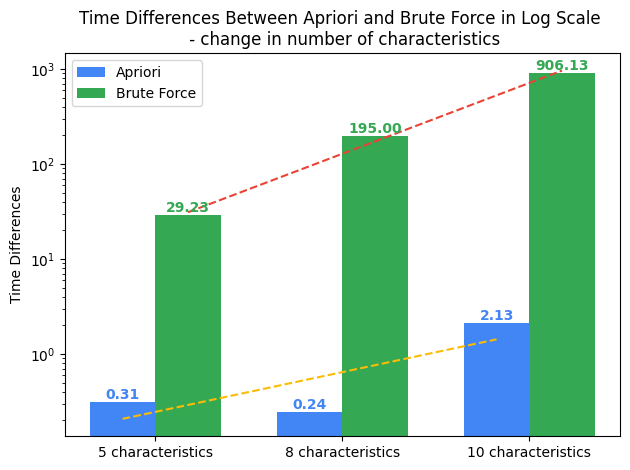

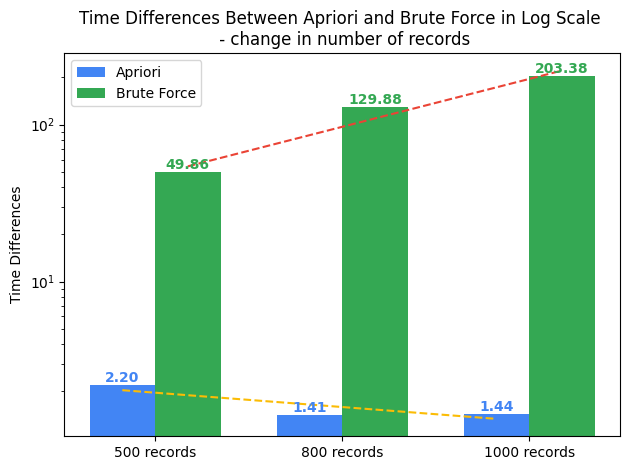

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_time_differences(apriori_time_diffs, brute_force_time_diffs, title_input=''):
  items = list(apriori_time_diffs.keys())
  apriori_times = list(apriori_time_diffs.values())
  brute_force_times = list(brute_force_time_diffs.values())

  x = range(len(items))
  width = 0.35

  fig, ax = plt.subplots()
  ax.bar(x, apriori_times, width, label='Apriori', color='#4285F4')
  ax.bar([p + width for p in x], brute_force_times, width, label='Brute Force', color='#34A853')

  ax.set_xticks([p + width/2 for p in x])
  ax.set_xticklabels(items)
  ax.set_yscale('log')  # Set y-axis to logarithmic scale
  ax.set_ylabel('Time Differences')
  ax.set_title('Time Differences Between Apriori and Brute Force in Log Scale ' + title_input)
  ax.legend()

  # Calculate trend line for Apriori
  apriori_x_values = list(x)
  apriori_y_values = apriori_times
  apriori_coefficients = np.polyfit(apriori_x_values, np.log(apriori_y_values), 1)
  apriori_trend_line = np.exp(np.polyval(apriori_coefficients, apriori_x_values))

  # Calculate trend line for Brute Force
  brute_force_x_values = [p + width for p in list(x)]
  brute_force_y_values = brute_force_times
  brute_force_coefficients = np.polyfit(brute_force_x_values, np.log(brute_force_y_values), 1)
  brute_force_trend_line = np.exp(np.polyval(brute_force_coefficients, brute_force_x_values))

  # Plot the trend lines using colors
  ax.plot(apriori_x_values, apriori_trend_line, color='#FBBC05', linestyle='--', label='Apriori Trend Line')
  ax.plot(brute_force_x_values, brute_force_trend_line, color='#EA4335', linestyle='--', label='Brute Force Trend Line')

  # Add original numbers (before log) as text annotations on the bars
  for i, apriori_time in enumerate(apriori_times):
    ax.text(i, apriori_time, f'{apriori_time:.2f}', ha='center', va='bottom', color='#4285F4', fontweight='bold')
  for i, brute_force_time in enumerate(brute_force_times):
    ax.text(i + width, brute_force_time, f'{brute_force_time:.2f}', ha='center', va='bottom', color='#34A853', fontweight='bold')

  plt.xticks()
  plt.tight_layout()
  plt.show()


plot_time_differences(dict(list(apriori_time_diffs.items())[:3]), dict(list(brute_force_time_diffs.items())[:3]), '\n - change in number of characteristics')
plot_time_differences(dict(list(apriori_time_diffs.items())[3:]), dict(list(brute_force_time_diffs.items())[3:]), '\n - change in number of records')

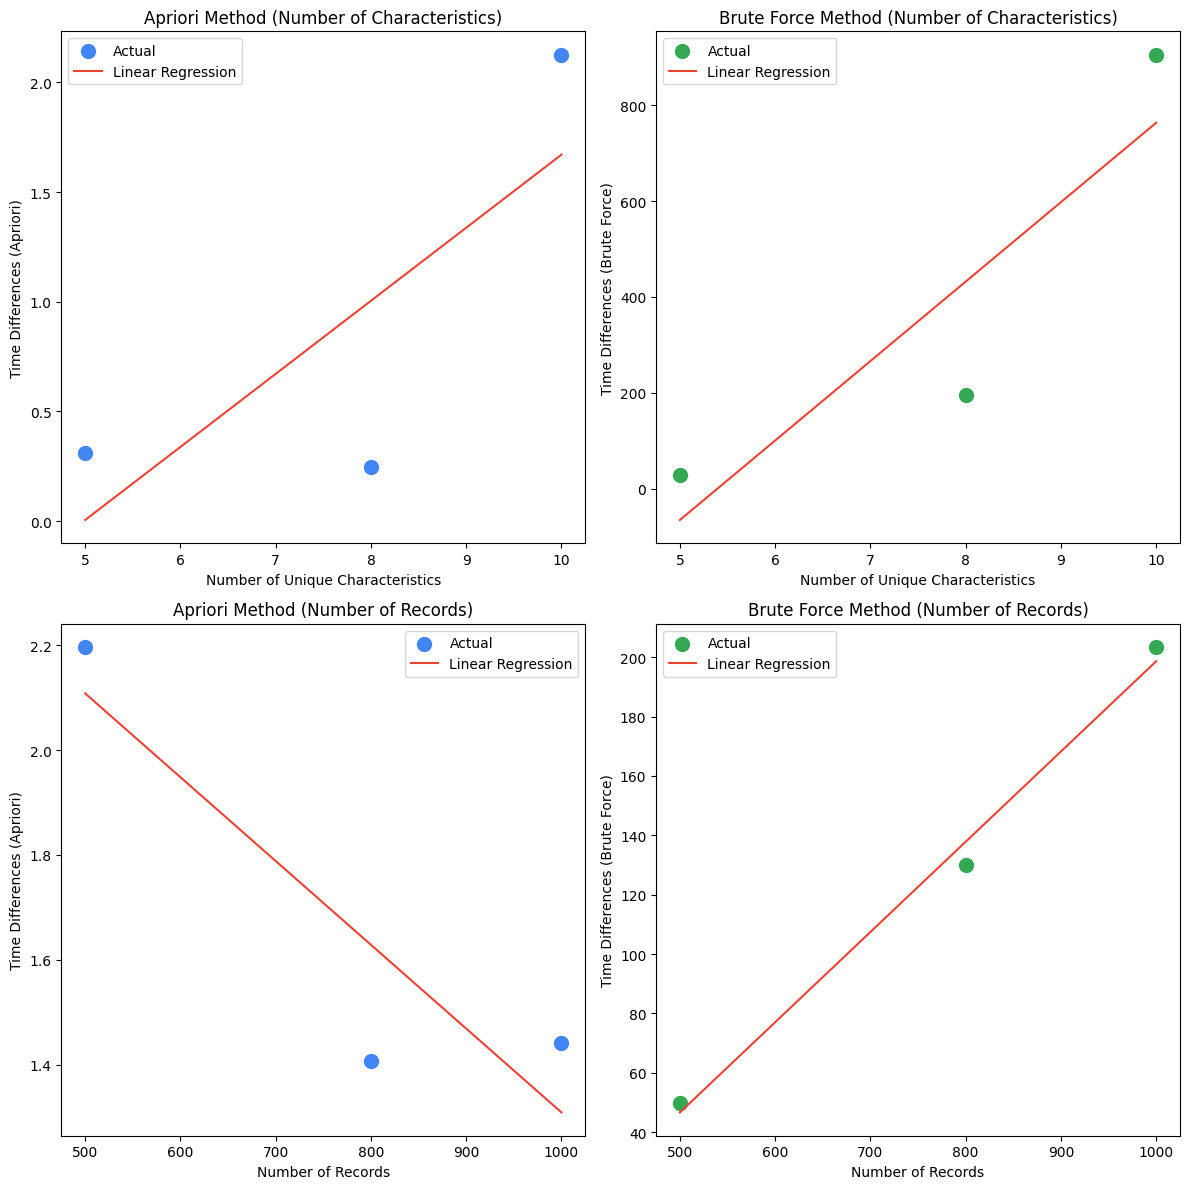

In [ ]:
from sklearn.linear_model import LinearRegression

def plot_patterns(apriori_time_diffs, brute_force_time_diffs):
  # Extracting data for linear regression
  unique_items = np.array([5, 8, 10, 5, 8, 10])
  transactions = np.array([500, 800, 1000, 500, 800, 1000])
  apriori_times = np.array(list(apriori_time_diffs.values()))
  brute_force_times = np.array(list(brute_force_time_diffs.values()))

  # Reshape the data for sklearn
  unique_items_reshaped = unique_items.reshape(-1, 1)
  transactions_reshaped = transactions.reshape(-1, 1)

  # Perform linear regression for Apriori method based on number of items
  apriori_items_regression = LinearRegression().fit(unique_items_reshaped[:3], apriori_times[:3])
  apriori_items_predicted = apriori_items_regression.predict(unique_items_reshaped[:3])

  # Perform linear regression for Brute Force method based on number of items
  brute_force_items_regression = LinearRegression().fit(unique_items_reshaped[:3], brute_force_times[:3])
  brute_force_items_predicted = brute_force_items_regression.predict(unique_items_reshaped[:3])

  # Perform linear regression for Apriori method based on number of transactions
  apriori_transactions_regression = LinearRegression().fit(transactions_reshaped[:3], apriori_times[3:])
  apriori_transactions_predicted = apriori_transactions_regression.predict(transactions_reshaped[:3])

  # Perform linear regression for Brute Force method based on number of transactions
  brute_force_transactions_regression = LinearRegression().fit(transactions_reshaped[:3], brute_force_times[3:])
  brute_force_transactions_predicted = brute_force_transactions_regression.predict(transactions_reshaped[:3])

  # Visualization with larger dots
  plt.figure(figsize=(12, 12))

  # Apriori method based on number of items
  plt.subplot(2, 2, 1)
  plt.scatter(unique_items[:3], apriori_times[:3], label='Actual', color='#4285F4', s=100)  # Larger dots
  plt.plot(unique_items[:3], apriori_items_predicted, label='Linear Regression', color='#EA4335')
  plt.xlabel('Number of Unique Characteristics')
  plt.ylabel('Time Differences (Apriori)')
  plt.title('Apriori Method (Number of Characteristics)')
  plt.legend()

  # Brute Force method based on number of items
  plt.subplot(2, 2, 2)
  plt.scatter(unique_items[:3], brute_force_times[:3], label='Actual', color='#34A853', s=100)  # Larger dots
  plt.plot(unique_items[:3], brute_force_items_predicted, label='Linear Regression', color='#EA4335')
  plt.xlabel('Number of Unique Characteristics')
  plt.ylabel('Time Differences (Brute Force)')
  plt.title('Brute Force Method (Number of Characteristics)')
  plt.legend()

  # Apriori method based on number of transactions
  plt.subplot(2, 2, 3)
  plt.scatter(transactions[:3], apriori_times[3:], label='Actual', color='#4285F4', s=100)  # Larger dots
  plt.plot(transactions[:3], apriori_transactions_predicted, label='Linear Regression', color='#EA4335')
  plt.xlabel('Number of Records')
  plt.ylabel('Time Differences (Apriori)')
  plt.title('Apriori Method (Number of Records)')
  plt.legend()

  # Brute Force method based on number of transactions
  plt.subplot(2, 2, 4)
  plt.scatter(transactions[:3], brute_force_times[3:], label='Actual', color='#34A853', s=100)  # Larger dots
  plt.plot(transactions[:3], brute_force_transactions_predicted, label='Linear Regression', color='#EA4335')
  plt.xlabel('Number of Records')
  plt.ylabel('Time Differences (Brute Force)')
  plt.title('Brute Force Method (Number of Records)')
  plt.legend()

  plt.tight_layout()
  plt.show()

plot_patterns(apriori_time_diffs, brute_force_time_diffs)